<a href="https://colab.research.google.com/github/mashalkhyber/AI-LABS/blob/main/Fuzzy_Reasoning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.6 MB/s eta 0:00:00


Design fuzzy inference systems for the Restaurant Tipping and ABS Brake Systems problems. Implement fuzzy logic rules and defuzzification to make decisions based on fuzzy inputs.

fuzzy inference systems (FIS) for the Restaurant Tipping and ABS Brake Systems problems. We'll implement fuzzy logic rules and defuzzification to make decisions based on fuzzy inputs.

Restaurant Tipping Problem In the restaurant tipping problem, we'll use fuzzy logic to decide the tip amount based on the quality of service and the quality of food.

# ABS Brake System Problem In the ABS (Anti-lock Braking System) problem, we'll use fuzzy logic to decide the brake pressure based on the speed of the car and the wheel slip.**bold text**

Tip Output: 10.89
Brake Output: 74.45


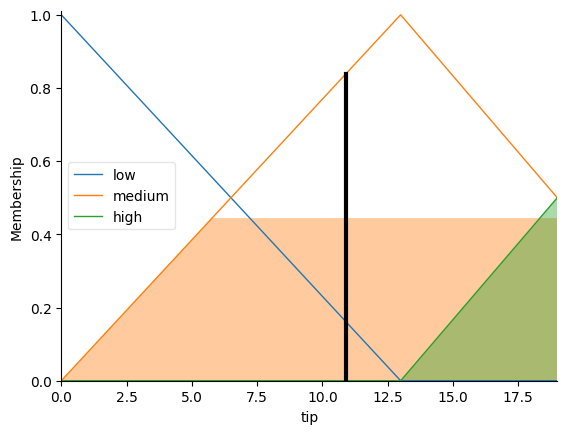

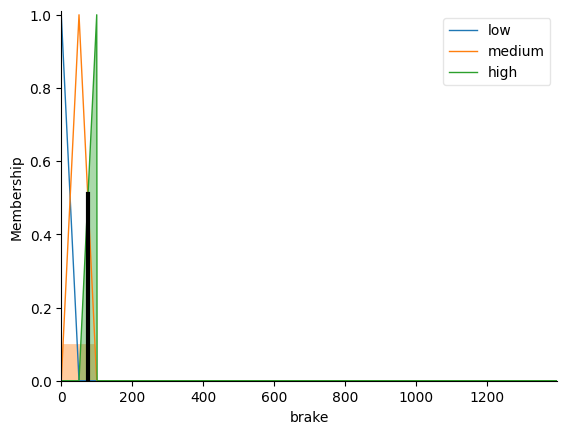

In [6]:
# ================================
# FUZZY LOGIC SYSTEMS
# Restaurant Tipping + ABS Brake
# Editable Version for Google Colab
# ================================

!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# ================================
# 🔧 EDIT YOUR INPUT VALUES HERE
# ================================
SERVICE_VALUE = 7.0     # change service rating (0–10)
FOOD_VALUE = 8.5        # change food rating (0–10)

SPEED_VALUE = 60        # change vehicle speed (0–100)
SLIP_VALUE = 4          # change wheel slip (0–10)
# ================================


# --------------------------------
# 1. Restaurant Tipping System
# --------------------------------
def restaurant_tipping():
    # Define input & output variables
    service = ctrl.Antecedent(np.arange(0, 10, 1), 'service')
    food = ctrl.Antecedent(np.arange(0, 10, 1), 'food')
    tip = ctrl.Consequent(np.arange(0, 20, 1), 'tip')

    # Membership functions
    service.automf(3)
    food.automf(3)

    tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
    tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
    tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

    # Rules
    rule1 = ctrl.Rule(service['poor'] | food['poor'], tip['low'])
    rule2 = ctrl.Rule(service['average'], tip['medium'])
    rule3 = ctrl.Rule(service['good'] | food['good'], tip['high'])

    tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
    tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

    # Use user values
    tipping.input['service'] = SERVICE_VALUE
    tipping.input['food'] = FOOD_VALUE

    tipping.compute()
    print(f"Tip Output: {tipping.output['tip']:.2f}")

    tip.view(sim=tipping)


# --------------------------------
# 2. ABS Brake System
# --------------------------------
def abs_brake_system():
    speed = ctrl.Antecedent(np.arange(0, 1200, 1), 'speed')
    slip = ctrl.Antecedent(np.arange(0, 1300, 1), 'slip')
    brake = ctrl.Consequent(np.arange(0, 1400, 1), 'brake')

    speed.automf(3)
    slip.automf(3)

    brake['low'] = fuzz.trimf(brake.universe, [0, 0, 50])
    brake['medium'] = fuzz.trimf(brake.universe, [0, 50, 100])
    brake['high'] = fuzz.trimf(brake.universe, [50, 100, 100])

    rule1 = ctrl.Rule(speed['poor'] | slip['poor'], brake['high'])
    rule2 = ctrl.Rule(speed['average'], brake['medium'])
    rule3 = ctrl.Rule(speed['good'] | slip['good'], brake['low'])

    braking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
    braking = ctrl.ControlSystemSimulation(braking_ctrl)

    # Use user values
    braking.input['speed'] = SPEED_VALUE
    braking.input['slip'] = SLIP_VALUE

    braking.compute()
    print(f"Brake Output: {braking.output['brake']:.2f}")

    brake.view(sim=braking)


# --------------------------------
# Run both systems
# --------------------------------
restaurant_tipping()
abs_brake_system()

plt.show()
